**PART 1**

In [96]:
import nltk
import re
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
f = open("peterpan.txt", "r", encoding="utf-8-sig")
t = f.read()
len(t)

274950

In [31]:
t = re.sub(r"\n+", " ", t)
print(t[:100])

The Project Gutenberg eBook of Peter Pan, by James M. Barrie This eBook is for the use of anyone any


This number represents the number of total characters in the file.

In [32]:
import nltk.tokenize as tok
sents = tok.sent_tokenize(t, language="english")
len(sents)

2563

Before and after adding the spaces, the result is the same (number of sentences).

In [33]:
print(sents[0])
print("====")
print(sents[1])
print("====")

The Project Gutenberg eBook of Peter Pan, by James M. Barrie This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever.
====
You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org.
====


In [159]:
f = open("peterpan.txt", "r", encoding="utf-8-sig")
t = f.read()
tokens = tok.word_tokenize(t, language="english")
print(tokens[:30])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Peter', 'Pan', ',', 'by', 'James', 'M.', 'Barrie', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of']


What happened to the line breaks?

They are not considered in the tokens.

How many tokens does the text contains?

In [160]:
len(tokens)

61945

**PART 2**

In [161]:
import collections
c = collections.Counter(tokens)
print(c.most_common(10))
print(c["with"])

[(',', 3981), ('.', 2441), ('the', 2330), ('“', 1464), ('”', 1464), ('and', 1420), ('to', 1222), ('a', 959), ('of', 923), ('was', 920)]
361


In [163]:
import string
tokens_new = [i for i in tokens if i not in string.punctuation]
c = collections.Counter(tokens_new)
del(c["and"])
del(c["“"])
del(c["”"])
del(c["’"])
print(c.most_common(10))

[('the', 2330), ('to', 1222), ('a', 959), ('of', 923), ('was', 920), ('he', 878), ('in', 698), ('it', 655), ('that', 609), ('had', 499)]


In [71]:
df = pd.DataFrame(c.items(), columns=['Item', 'Count'])
df.head()

,Item,Count
0,The,166
1,Project,84
2,Gutenberg,28
3,eBook,11
4,of,923


How many types and how many tokens does the text contain? 

In [78]:
num_types = len(set(tokens))
num_types

6105

What is its type-token-ratio?

In [79]:
num_types/len(tokens)

0.09855516990879006

How many hapaxes are in the dataset?

In [82]:
hapaxes = df[df["Count"] == 1].count()[0]
hapaxes

3133

What percentage of all word types are hapaxes?

In [83]:
hapaxes/num_types

0.5131859131859132

How many word types start with upper case A?


In [92]:
types_a = [i for i in set(tokens) if i.startswith("A")] #list of tokens that starts with "A"
len(types_a)

51

**PART 3**

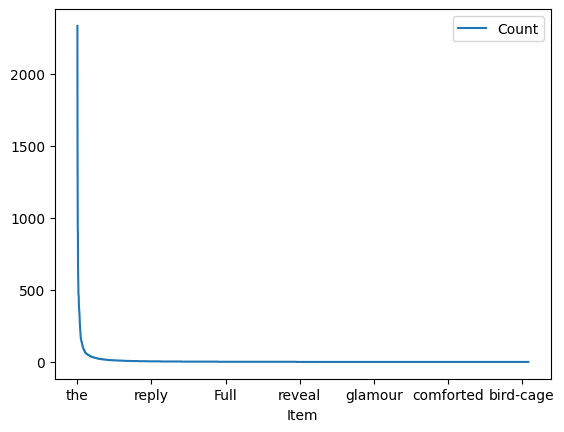

In [97]:
df = df.sort_values('Count', ascending=False) #sort in a non ascending order
df.plot(x='Item', y='Count')
plt.show()

Modify the command to only display the 20 most frequent words. Also try to display all words on the x 
axis.

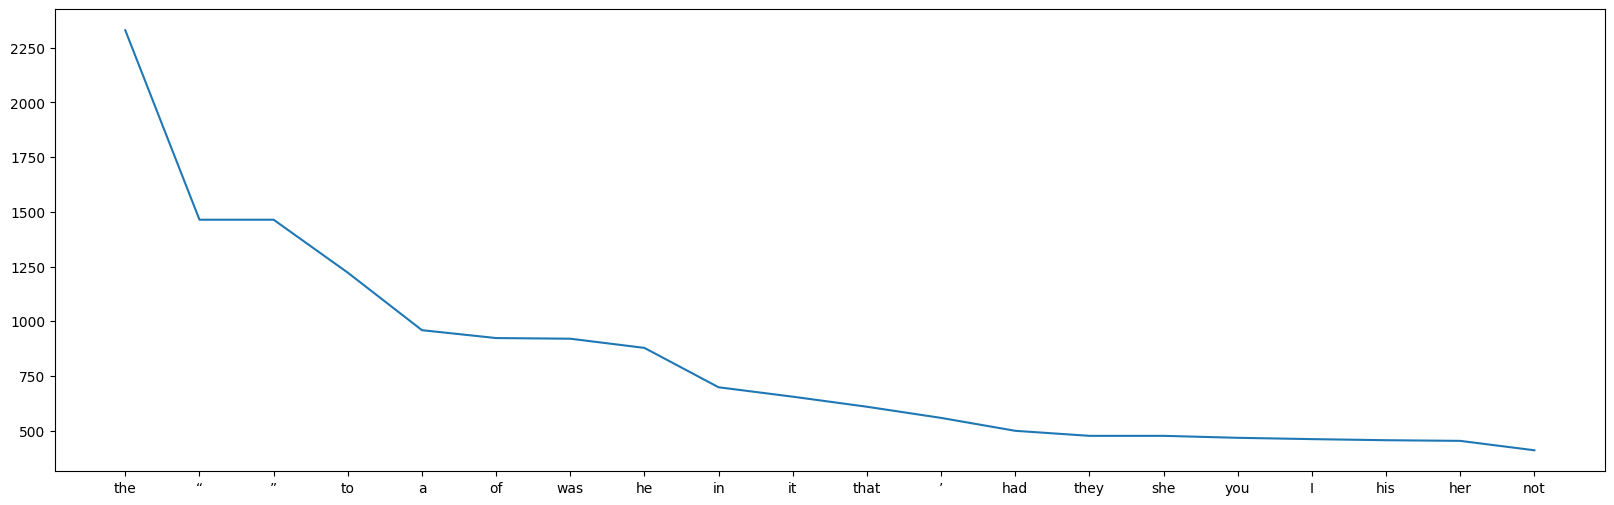

In [117]:
df = df.sort_values('Count', ascending=False)
plt.figure(figsize=(20, 6))
plt.plot(df.head(20).Item, df.head(20).Count) #plot only the first 20 items 
plt.show()

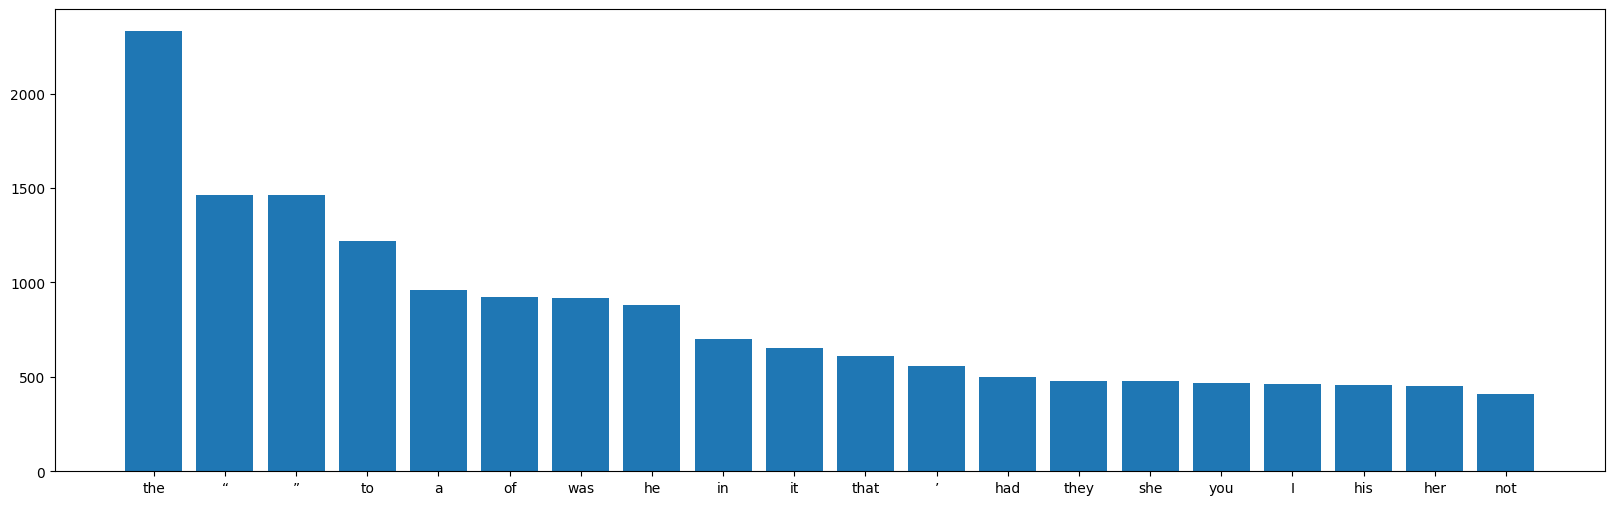

In [118]:
df = df.sort_values('Count', ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(df.head(20).Item, df.head(20).Count) #plot only the first 20 items 
plt.show()

Zipf’s law states that the product of the frequency of a word and of its rank is approximately constant.
Let us verify this law on a subset of our frequency distribution.

In [120]:
df_zipf = df[:2000].reset_index(drop=True)
df_zipf["z"] = df_zipf.index.values * df_zipf["Count"]

In [121]:
df_zipf

,Item,Count,z
0,the,2330,0
1,“,1464,1464
2,”,1464,2928
3,to,1222,3666
4,a,959,3836
...,...,...,...
1995,card,2,3990
1996,character,2,3992
1997,astonishing,2,3994
1998,handful,2,3996


What are the highest, lowest and average values of z that you observe? Plot the z values as a line chart.

In [127]:
df_zipf["z"].max(), df_zipf["z"].min(), df_zipf["z"].mean()

(9450, 0, 5518.613)

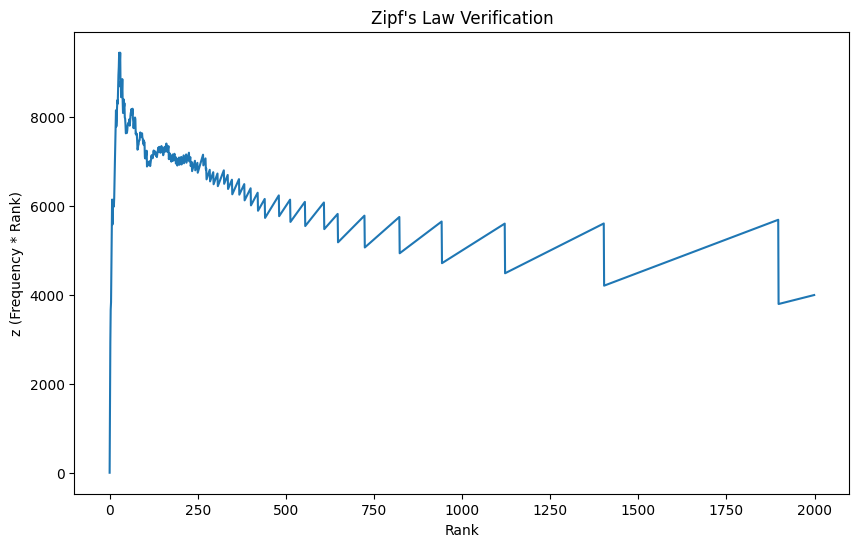

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(df_zipf.index, df_zipf['z']) #plot only the first 20 items 
plt.xlabel('Rank')
plt.ylabel('z (Frequency * Rank)')
plt.title('Zipf\'s Law Verification')
plt.show()

**PART 4**

In [145]:
f = open("alice.txt", "r", encoding="utf-8-sig")
t = f.read()
len(t)

169442

In [146]:
t = re.sub(r"\n+", " ", t)
print(t[:100])

The Project Gutenberg eBook of Le avventure d'Alice nel paese delle meraviglie      This ebook is fo


In [147]:
import nltk.tokenize as tok
sents = tok.sent_tokenize(t, language="english")
len(sents)

1749

In [148]:
print(sents[0])
print("====")
print(sents[1])
print("====")

The Project Gutenberg eBook of Le avventure d'Alice nel paese delle meraviglie      This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever.
====
You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org.
====


In [164]:
f = open("alice.txt", "r", encoding="utf-8-sig")
t = f.read()
tokens = tok.word_tokenize(t, language="english")
print(tokens[:30])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Le', 'avventure', "d'Alice", 'nel', 'paese', 'delle', 'meraviglie', 'This', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of']


In [165]:
len(tokens)

34736

In [166]:
import collections
import string
tokens_new = [i for i in tokens if i not in string.punctuation]
c = collections.Counter(tokens_new)
del(c["``"])
del(c["''"])
del(c["--"])
print(c.most_common(10))

[('e', 766), ('il', 638), ('che', 563), ('la', 556), ('di', 518), ('a', 445), ('Alice', 393), ('non', 369), ('un', 348), ('disse', 276)]


In [167]:
df = pd.DataFrame(c.items(), columns=['Item', 'Count'])
df.head()

,Item,Count
0,The,12
1,Project,86
2,Gutenberg,30
3,eBook,9
4,of,113


In [170]:
num_types = len(set(tokens))
num_types, num_types/len(tokens)

(6122, 0.1762436665131276)

In [171]:
hapaxes = df[df["Count"] == 1].count()[0]
hapaxes, hapaxes/num_types

(3702, 0.6047043449852989)

In [172]:
types_a = [i for i in set(tokens) if i.startswith("A")] #list of tokens that starts with "A"
len(types_a)

57

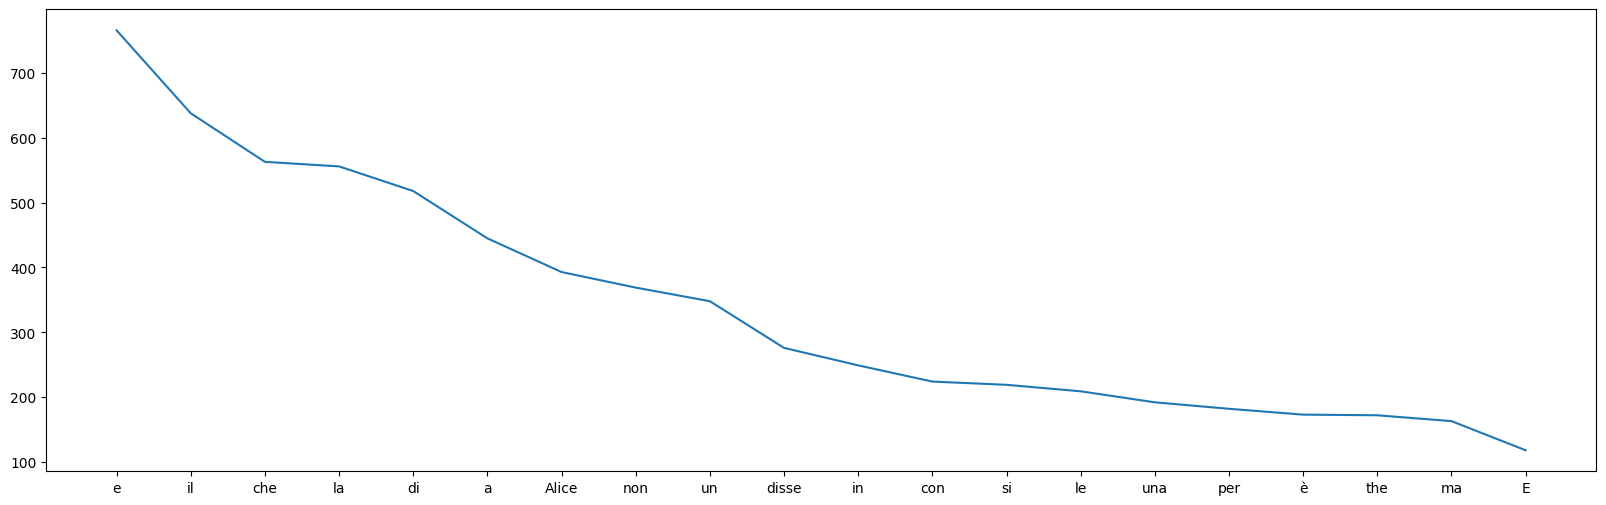

In [173]:
df = df.sort_values('Count', ascending=False)
plt.figure(figsize=(20, 6))
plt.plot(df.head(20).Item, df.head(20).Count) #plot only the first 20 items 
plt.show()

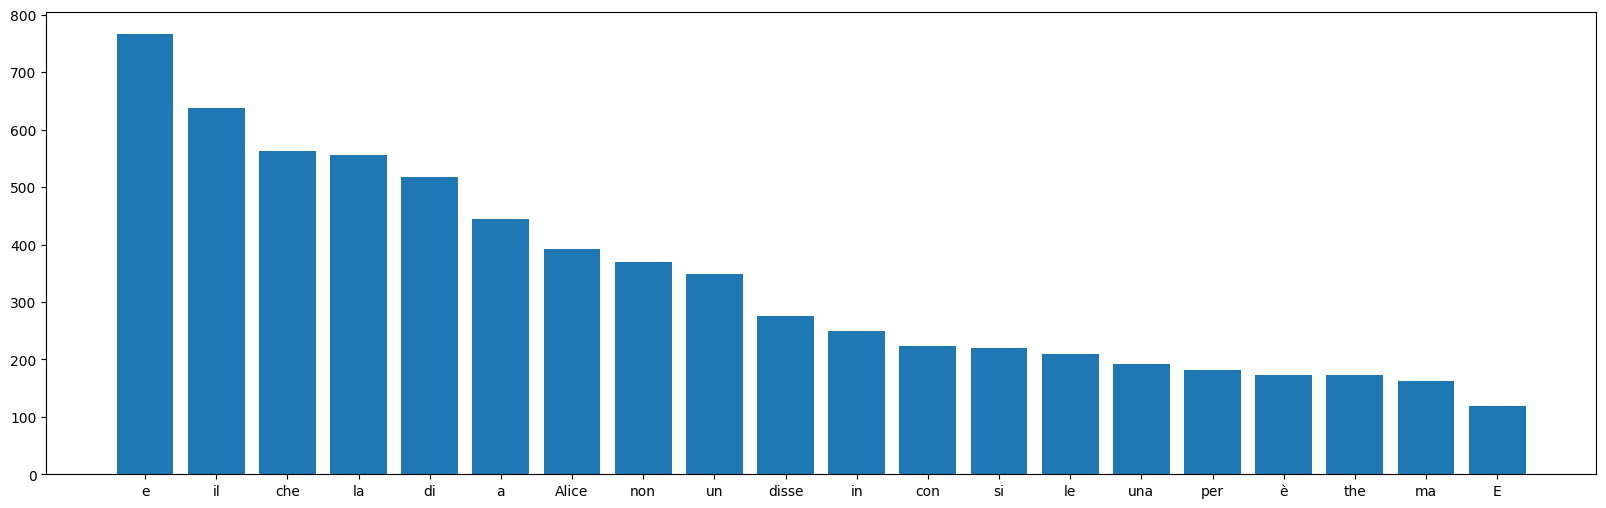

In [174]:
df = df.sort_values('Count', ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(df.head(20).Item, df.head(20).Count) #plot only the first 20 items 
plt.show()

In [175]:
df_zipf = df[:2000].reset_index(drop=True)
df_zipf["z"] = df_zipf.index.values * df_zipf["Count"]
df_zipf

,Item,Count,z
0,e,766,0
1,il,638,638
2,che,563,1126
3,la,556,1668
4,di,518,2072
...,...,...,...
1995,Zup,2,3990
1996,altrui,2,3992
1997,faccende,2,3994
1998,scambiate,2,3996


In [176]:
df_zipf["z"].max(), df_zipf["z"].min(), df_zipf["z"].mean()

(4347, 0, 3641.2555)

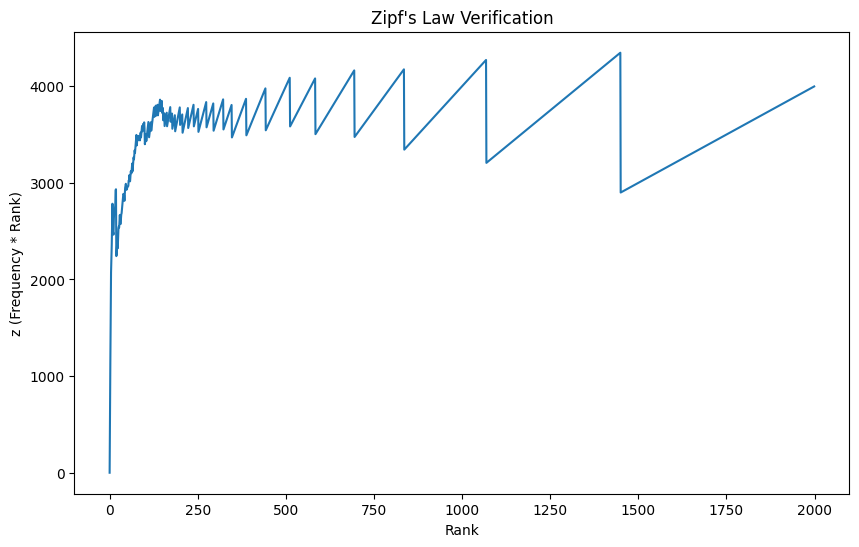

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(df_zipf.index, df_zipf['z']) #plot only the first 20 items 
plt.xlabel('Rank')
plt.ylabel('z (Frequency * Rank)')
plt.title('Zipf\'s Law Verification')
plt.show()